# Determining Moore's Law with real data in NumPy

## Background

Gordon Moore predicted that the rate of semiconductors on a computer chip would double every two years in the decade from 1965 - 1975 [[1](https://en.wikipedia.org/wiki/Moore%27s_law),[2](https://spectrum.ieee.org/computing/hardware/gordon-moore-the-man-whose-name-means-progress)]. Semiconductor manufacuturers were able to keep up with Moore's law until 2015. 

In this tutorial, we will use NumPy to perform linear regression on semiconductor manufacturing data. We will determine the best-fit constants to describe the exponential growth of transistors on semiconductors compared to Moore's Law.  

In this tutorial, we will use the following Python tools:

* `np.loadtxt`
* `np.polyfit` or `scipy.linalg.lstsq`
* `plt.plot`
* `np.log` 
* slicing arrays
* boolean slicing
* `matplotlib.pyplot.semilogy` 
* `np.savez` and `np.savetxt`

## Building Moore's law as an exponential function

Our empirical model will assume that the number of transistors per semiconducter follows an exponential growth,  

$log(transistor~count)= f(year) = A\cdot year+B,$

where $A$ and $B$ are fitting constants that will be determined using semiconductor manufacturers' data. 

These constants for Moore's law are determined by specifying the rate that transistors are add, 2, and giving an initial number of transistors for a given year. 

Moore's law in our exponential form is stated as follows, 

$transistor~count= e^{A_M\cdot year +B_M}.$

Where $A_M$ and $B_M$ are constants that double the number of transistors every two years and start at 2250 transistors in 1971,

1. $\frac{transistor\_count(year +2)}{transistor\_count(year)} = 2 = \frac{e^{B_M}e^{A_M year + 2A_M}}{e^{B_M}e^{A_M year}} = e^{2A_M} \rightarrow A_M = \log(2)/2$

2. $\log(2250) = \log(2)/2\cdot 1971 + B_M \rightarrow B_M = \log(2250)-\log(2)/2\cdot 1971$

so Moore's law stated as an exponential function is

$log(transistor~count)= A_M\cdot year+B_M,$

where

$A_M=0.3466$

$B_M=-675.4$

## Fitting historical data to our exponential function

First, load our functions for NumPy, SciPy, and Matplotlib

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq

### Loading data from a csv

Now, we need to load in the historical data for semiconductors per chip. The `transistor_data.csv` was downloaded from the Wikipedia page for [Transistor Count](https://en.wikipedia.org/wiki/Transistor_count#Microprocessors). Before loading a comma-separated value file into a NumPy array, its a good idea to inspect the structure of the file first. Then, locate the columns of interest and save them to a variable, `data`-in this case, and proceed to the next step of data processing. 

Here, we print out the first 10 rows of `transistor_data.csv`. The columns are 

|Processor|MOS transistor count|Date of Introduction|Designer|MOSprocess|Area|
|---|---|---|---|---|---|
|Intel 4004 (4-bit  16-pin)|2250|1971|Intel|"10,000 nm"|12 mm²|
|...|...|...|...|...|...|

In [5]:
! head transistor_data.csv

Processor,MOS transistor count,Date of Introduction,Designer,MOSprocess,Area
Intel 4004 (4-bit  16-pin),2250,1971,Intel,"10,000 nm",12 mm²
Intel 8008 (8-bit  18-pin),3500,1972,Intel,"10,000 nm",14 mm²
NEC μCOM-4 (4-bit  42-pin),2500,1973,NEC,"7,500 nm",?
Intel 4040 (4-bit  16-pin),3000,1974,Intel,"10,000 nm",12 mm²
Motorola 6800 (8-bit  40-pin),4100,1974,Motorola,"6,000 nm",16 mm²
Intel 8080 (8-bit  40-pin),6000,1974,Intel,"6,000 nm",20 mm²
TMS 1000 (4-bit  28-pin),8000,1974,Texas Instruments,"8,000 nm",11 mm²
MOS Technology 6502 (8-bit  40-pin),4528,1975,MOS Technology,"8,000 nm",21 mm²
Intersil IM6100 (12-bit  40-pin; clone of PDP-8),4000,1975,Intersil,,


We don't need the columns that specify __Processor__, __Designer__, __MOSprocess__, or __Area__, so that leaves the second and third columns, __MOS transistor count__ and __Date of Introduction__, respectively.

Next, we load these two columns into a NumPy array using `np.loadtxt`. There are extra options to get the data in the desired format:

* `delimiter = ','`: specify delimeter as a comma ',' (this is the default behavior)
* `usecols = [1,2]`: only import the second and third columns from the csv
* `skiprows = 1`: do not use the first row, because its a header row

In [7]:
data = np.loadtxt('./transistor_data.csv', 
                  delimiter=',', 
                  usecols=[1,2], 
                  skiprows=1)

The entire history of semiconducting is loaded into a NumPy array named `data`. The first column is the __MOS transistor count__ and the second column is the __Date of Introduction__ in a four-digit year. 

Next, we make our data easier to read and manage by assigning the two columns to variables, `year` and `transistor_count`. Print out the first 10 values to check that we have the saved the data to the correct variables. 

In [9]:
year = data[:, 1] # grab the second column and assign 
transistor_count = data[:, 0] # grab the first column and assign

print('year:\t\t',year[:10])
print('trans. cnt:\t',transistor_count[:10])


year:		 [1971. 1972. 1973. 1974. 1974. 1974. 1974. 1975. 1975. 1975.]
trans. cnt:	 [2250. 3500. 2500. 3000. 4100. 6000. 8000. 4528. 4000. 5000.]


Our data is saved to an independent variable, `year`, and dependent variable, `transistor_count`. Transform the independent variable to our log-scale, 

$y_i = \log($ `transistor_count[i]` $),$

which results in a linear equation, 

$y_i = A\cdot year +B.$

Now, if we want to know how many more transistors per semiconductor were added every two years, we have the final formula,


In [7]:
A_M = np.log(2)/2
B_M = np.log(transistor_count[0]) - A_M*year[0]
transistor_Moores_law = np.exp(B_M)*np.exp(A_M*year)



$\Delta y_i = A \Delta x_i$ 

$\frac{transistor\_count(year +2)}{transistor\_count(year)} = xFactor = \frac{e^{B}e^{A year + 2A}}{e^{B}e^{A year}} = e^{2A}$

where increase in number of transistors is $e^{\Delta y_i},$ number of years is $x_i = \frac{2~years}{2019-1971},$ and $A$ is the best fit slope on our semilog function. 

In [8]:
yi = np.log(transistor_count)
A, B = np.polyfit(year, yi, 1)

print('Rate of semiconductors added on a chip every 2 years:')
print('\tx{:.3f} semiconductors per chip'.format(np.exp(A*2)))

Rate of semiconductors added on a chip every 2 years:
	x1.980 semiconductors per chip


In [9]:
Z = np.block([year[:,np.newaxis]**1,year[:,np.newaxis]**0])
print(A, B)
lstsq(Z,yi)

0.3416320825591656 -666.326406353631


(array([ 3.41632083e-01, -6.66326406e+02]),
 222.42348220852344,
 2,
 array([2.67835101e+04, 9.42818399e-02]))

In [10]:
A, B = np.polyfit(year,yi,1)
print(np.exp(A*2))

1.980331322133242


Based upon our least-squares regression model, the number of semiconductors per chip increased by a factor of 1.98. We have a model that predicts the number of semiconductors each year, now we can compare it to the actual manufacturing reports. 

We directly compare the number of predicted transistors to the actual number of transistors per microprocessor over the course of manufacturing history. We'll plot the linear regression results and all of the semiconductor numbers of transistors. 

Here, we use `matplotlib.pyplot.semilogy` to plot the number of transistors on a log-scale and the year on a linear scale. We have defined a few variables to get to a final model

$y_i = \log(transistor\_count),$

$y_i = A \cdot year + B,$

and

$log(transistor\_count) = A\cdot year + B,$

our variables, `transistor_count`, `year`, and `yi` all have the same dimensions, `(179,)`. NumPy arrays need the same dimensions to make a plot. The predicted number of transistors is finally determined 

$transistor\_count_{predicted} = e^Be^{A\cdot year}.$



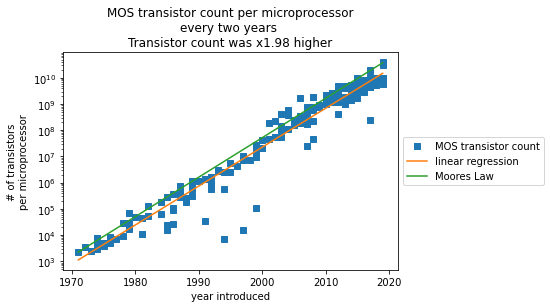

In [11]:
transistor_count_predicted = np.exp(B)*np.exp(A*year)

plt.semilogy(year,transistor_count,'s',label='MOS transistor count')
plt.semilogy(year,transistor_count_predicted,label='linear regression')


plt.plot(year,transistor_Moores_law,label = 'Moores Law')
plt.title('MOS transistor count per microprocessor\n'+
          'every two years \n'+
          'Transistor count was x{:.2f} higher'.format(np.exp(A*2)))
plt.xlabel('year introduced')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.ylabel('# of transistors\nper microprocessor');

In [163]:
GMB

-675.3778609466276

The linear regression captures the increase in the number of transistors per semiconductors each year.  In 2015, semiconductor manufacturers claimed they could not keep up with Moore's law anymore. Our analysis shows that since 1971, the average increase in transistor count was x1.98 every 2 years, but Gordon Moore predicted it would would be x2 every 2 years. 

Let's look at the year 2017, and compare our linear regression model to Gordon Moore's prediction. First, we need to get all of the transistor counts from the year 2017, we can do this with a Boolean comparator

`year == 2017`

In [160]:
transistor_count2017 = transistor_count[year == 2017]
print(transistor_count2017.max(),transistor_count2017.min(),transistor_count2017.mean())
print(np.exp(b)*np.exp(a*(2017-1971)/(2019-1971)))
print(np.exp(GMB)*np.exp(np.log(2)/2*2017))

19200000000.0 250000000.0 7050000000.0
7555217100.086955
18874368000.00118


The result is that our model is very close to the mean, but Gordon Moore's prediction is closer to the maximum number of transistors per microprocessor produced in 2017. Even though semiconductor manufacturers thought that the growth would slow, once in 1975 and again in 2015, we are still producing semiconductors every 2 years that double the number of transistors. 

The last step in the process is to share our findings. We have created new arrays that represent our linear regression model and Gordon Moore's prediction. We started this process by importing a csv file into a NumPy array using `n.loadtxt`, to save our model we will use two approaches

1. `np.savez` : to save NumPy arrays that can be loaded in other Python sessions
2. `np.savetxt` : to save a csv file with the original data and our predicted data

Using `np.savez`, we can save multiple arrays and give them names. The function `np.load` will load the arrays back into the workspace as a dictionary. We'll save a few arrays so the next user will have the year, transistor count, predicted transistor count, and Gordon Moore's predicted count. We'll add one more array that other users can use as a reference for the model, `notes`. 

In [170]:
notes = 'the arrays in this file are the result of a linear regression model\n'
notes += 'the arrays include\nyear: year of manufacture\n'
notes += 'transistor_count: number of transistors reported by manufacturers in a given year\n'
notes += 'transistor_count_predicted: linear regression model = exp({:.2f})*exp({:.2f}*year)\n'.format(B,A)
notes += 'transistor_Moores_law: Moores law =exp({:.2f})*exp({:.2f}*year)\n'.format(GMB,np.log(2)/2)
notes += 'regression_csts: linear regression constants A and B for log(transistor_count)=A*year+B'
print(notes)

the arrays in this file are the result of a linear regression model
the arrays include
year: year of manufacture
transistor_count: number of transistors reported by manufacturers in a given year
transistor_count_predicted: linear regression model = exp(-666.33)*exp(0.34*year)
transistor_Moores_law: Moores law =exp(-675.38)*exp(0.35*year)
regression_csts: linear regression constants A and B for log(transistor_count)=A*year+B


In [191]:
np.savez('./mooreslaw_regression.npz', notes = notes, 
         year = year, 
        transistor_count = transistor_count, 
        transistor_count_predicted = transistor_count_predicted, 
        transistor_Moores_law = transistor_Moores_law,
        regression_csts = np.array([A,B]))

In [193]:
results = np.load('./mooreslaw_regression.npz')

In [195]:
print(results['regression_csts'])

[ 3.41632083e-01 -6.66326406e+02]


In [192]:
! ls

01_Interacting_with_Python.ipynb.mod  Online_conversion/
03_Get_Oscillations.ipynb             out.png
20200324-hangouts.html                participation_image.png
20200324-hangouts.md                  participation.md
afm_data.csv                          participation.pdf
calendar.md                           part_new.pdf
CompMech01-Getting-started/           project_01/
CompMech02-Analyze-data/              project.bak.ipynb
CompMech03-IVPs/                      projectile_coords.npz
CompMech03-IVPs_project.ipynb         ps.csv
CompMech04-LinearAlgebra/             ps.ods
CompMech05-BVPs/                      ps.xls
Computational_Mechanics/              schedule.md
contact.txt                           server_cmd_hist
gh_key                                server_cmds
git_help.md                           solution_htmls/
git_help.pdf                          steel_price.dat
github_uconn/                         stiffness.tex
grades/                               syllabus.html
ipynb_

The benefit of `np.savez` is you can save multiple arrays in with different shapes and types. Here, we saved 4 arrays that are double precision floating point numbers shape = `(179,)`, one array that was text, and one array of double precision floating point numbers shape = `(2,).` This is the preferred method for saving NumPy arrays for use in another analysis. 

If we want to share data with other programs or view the results in a table, it is better to save the data into a text form. We can save the data using `np.savetxt`. This function is much more limited than `np.savez` because it is creating a table of readable text. You can save multiple 1D arrays, but they need to be the same length. 

We prepare the data for export by creating a new 2D array whose columns contain the data of interest. 

We can use the header to describe the columns of the file

In [12]:
head = 'the columns in this file are the result of a linear regression model\n'
head += 'the columns include\nyear: year of manufacture\n'
head += 'transistor_count: number of transistors reported by manufacturers in a given year\n'
head += 'transistor_count_predicted: linear regression model = exp({:.2f})*exp({:.2f}*year)\n'.format(B,A)
head += 'transistor_Moores_law: Moores law =exp({:.2f})*exp({:.2f}*year)\n'.format(GMB,np.log(2)/2)
head += 'year:, transistor_count:, transistor_count_predicted:, transistor_Moores_law:'
print(head)

the columns in this file are the result of a linear regression model
the columns include
year: year of manufacture
transistor_count: number of transistors reported by manufacturers in a given year
transistor_count_predicted: linear regression model = exp(-666.33)*exp(0.34*year)
transistor_Moores_law: Moores law =exp(-675.38)*exp(0.35*year)
year:, transistor_count:, transistor_count_predicted:, transistor_Moores_law:


In [13]:
output = np.block([year[:,np.newaxis],
                  transistor_count[:,np.newaxis],
                  transistor_count_predicted[:,np.newaxis],
                  transistor_Moores_law[:,np.newaxis]])

np.savetxt('mooreslaw_regression.csv', 
           X = output,
           delimiter = ',',
          header = head)

In [14]:
! head mooreslaw_regression.csv

# the columns in this file are the result of a linear regression model
# the columns include
# year: year of manufacture
# transistor_count: number of transistors reported by manufacturers in a given year
# transistor_count_predicted: linear regression model = exp(-666.33)*exp(0.34*year)
# transistor_Moores_law: Moores law =exp(-675.38)*exp(0.35*year)
# year:, transistor_count:, transistor_count_predicted:, transistor_Moores_law:
1.971000000000000000e+03,2.250000000000000000e+03,1.130514785642077413e+03,2.249999999999916326e+03
1.972000000000000000e+03,3.500000000000000000e+03,1.590908400343847916e+03,3.181980515339620069e+03
1.973000000000000000e+03,2.500000000000000000e+03,2.238793840141721375e+03,4.500000000000097316e+03
